In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from flask import Flask, render_template, request


In [9]:
data = pd.read_csv('/content/data (2).csv')


In [10]:
data.describe()


,PH,Turbidity,temperature,Potability
count,49.000000,49.000000,49.000000,49.000000
mean,7.359480,4.044541,5.004082,0.510204
std,1.987684,0.834371,1.222695,0.505076
min,3.445062,2.436086,3.600000,0.000000
25%,5.702926,3.464353,4.100000,0.000000
50%,7.371050,4.137739,4.500000,1.000000
75%,8.757257,4.528523,5.700000,1.000000
max,11.180284,6.038185,7.500000,1.000000


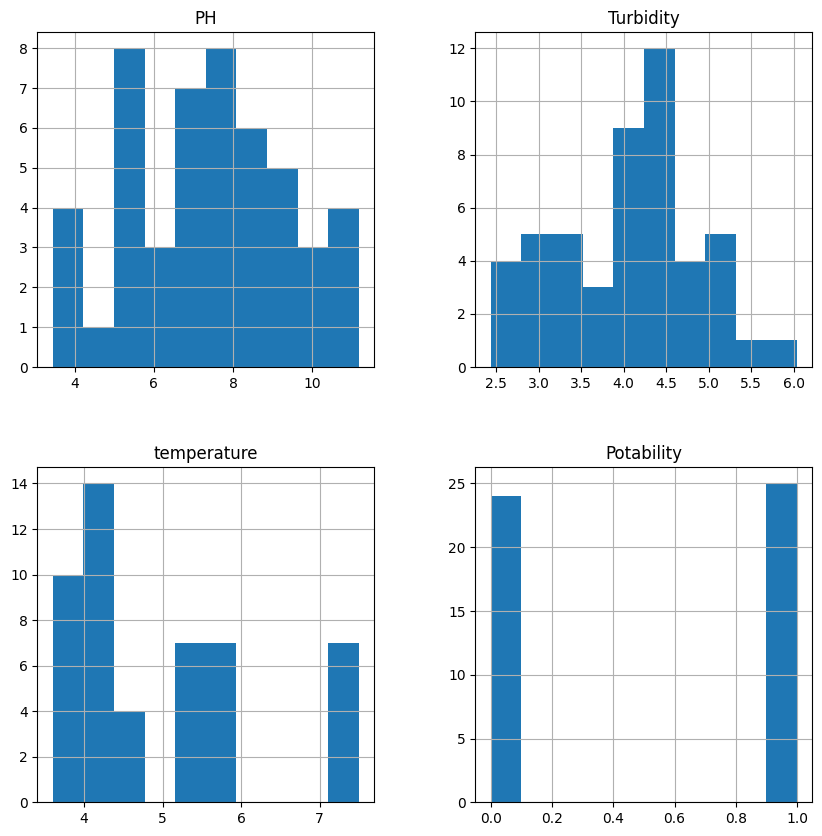

In [11]:
data.hist(figsize=(10, 10))
plt.show()


In [12]:
data.corr()


,PH,Turbidity,temperature,Potability
PH,1.000000,0.183576,0.240758,-0.000592
Turbidity,0.183576,1.000000,0.124952,0.193733
temperature,0.240758,0.124952,1.000000,-0.060792
Potability,-0.000592,0.193733,-0.060792,1.000000


In [14]:
data.isnull().sum()


PH             0
Turbidity      0
temperature    0
Potability     0
dtype: int64

In [13]:
X = data.drop('Potability', axis=1)
y = data['Potability']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)


In [17]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [18]:
y_pred_knn = knn.predict(X_test)


In [19]:
rf = RandomForestClassifier(n_estimators=100)


In [20]:
rf.fit(X_train, y_train)


RandomForestClassifier()

In [21]:
y_pred_rf = rf.predict(X_test)


In [22]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Akurasi KNN:", accuracy_knn)
print("Akurasi Random Forest:", accuracy_rf)


Akurasi KNN: 0.6
Akurasi Random Forest: 0.8


In [23]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix KNN:")
print(confusion_matrix_knn)
print("Confusion Matrix Random Forest:")
print(confusion_matrix_rf)


Confusion Matrix KNN:
[[3 0]
 [4 3]]
Confusion Matrix Random Forest:
[[3 0]
 [2 5]]


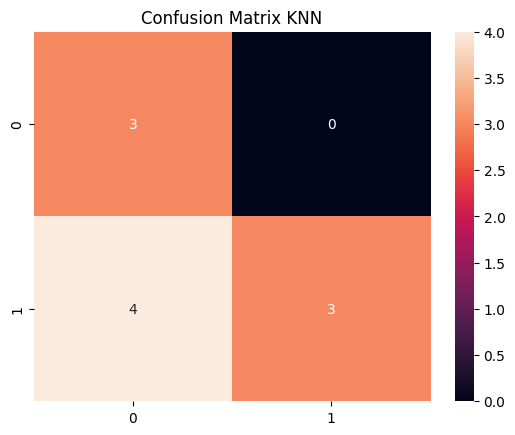

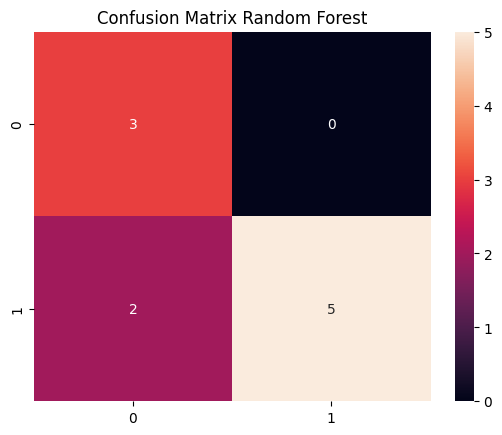

In [24]:
import seaborn as sns

sns.heatmap(confusion_matrix_knn, annot=True)
plt.title("Confusion Matrix KNN")
plt.show()

sns.heatmap(confusion_matrix_rf, annot=True)
plt.title("Confusion Matrix Random Forest")
plt.show()


In [ ]:
import pickle

pickle.dump(knn, open('model.pkl', 'wb'))


In [ ]:
pickle.dump(rf, open('model_random_forest.pkl', 'wb'))

